# 设定系统环境

In [61]:
import pandas as pd
import os
import numpy as np
pd.options.display.max_rows = 20; # 设定自由列表输出最多10行
# coding: utf-8

# 参数设定

In [3]:
# 文件参数
file_dir_input =  "..\\04 data\\PythonData\\PM25\\"
file_dir_output = "..\\04 data\\PythonData\\PM25\\out\\"
file_name_input = 'Beijing_2016_HourlyPM25_created20170201.csv'

# 数据清理

## 数据获取

In [4]:
os.listdir(file_dir_input)

['Beijing_2008_HourlyPM2.5_created20140325.csv',
 'Beijing_2009_HourlyPM25_created20140709.csv',
 'Beijing_2010_HourlyPM25_created20140709.csv',
 'Beijing_2011_HourlyPM25_created20140709.csv',
 'Beijing_2012_HourlyPM2.5_created20140325.csv',
 'Beijing_2013_HourlyPM2.5_created20140325.csv',
 'Beijing_2014_HourlyPM25_created20150203.csv',
 'Beijing_2015_HourlyPM25_created20160201.csv',
 'Beijing_2016_HourlyPM25_created20170201.csv']

In [4]:
df = pd.read_csv(file_dir_input + file_name_input,encoding='unicode_escape')
df

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,1/1/2016 0:00,2016,1,1,0,231,ç»?m?1 Hr,Valid,NaN
1,Beijing,PM2.5,1/1/2016 1:00,2016,1,1,1,239,ç»?m?1 Hr,Valid,NaN
2,Beijing,PM2.5,1/1/2016 2:00,2016,1,1,2,205,ç»?m?1 Hr,Valid,NaN
3,Beijing,PM2.5,1/1/2016 3:00,2016,1,1,3,167,ç»?m?1 Hr,Valid,NaN
4,Beijing,PM2.5,1/1/2016 4:00,2016,1,1,4,132,ç»?m?1 Hr,Valid,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,Beijing,PM2.5,12/31/2016 19:00,2016,12,31,19,409,ç»?m?1 Hr,Valid,NaN
8780,Beijing,PM2.5,12/31/2016 20:00,2016,12,31,20,432,ç»?m?1 Hr,Valid,NaN
8781,Beijing,PM2.5,12/31/2016 21:00,2016,12,31,21,482,ç»?m?1 Hr,Valid,NaN
8782,Beijing,PM2.5,12/31/2016 22:00,2016,12,31,22,488,ç»?m?1 Hr,Valid,NaN


## 作业1：4.6  实战；对PM数据做简单清理

In [5]:
df2 = df.drop(columns=['Parameter', 'Duration', 'Unit','QC Name'])
df2

,Site,Date (LST),Year,Month,Day,Hour,Value
0,Beijing,1/1/2016 0:00,2016,1,1,0,231
1,Beijing,1/1/2016 1:00,2016,1,1,1,239
2,Beijing,1/1/2016 2:00,2016,1,1,2,205
3,Beijing,1/1/2016 3:00,2016,1,1,3,167
4,Beijing,1/1/2016 4:00,2016,1,1,4,132
...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488


In [6]:
df3 = df2.rename(columns={'Date (LST)':'Date','Value':'value'})
df3

,Site,Date,Year,Month,Day,Hour,value
0,Beijing,1/1/2016 0:00,2016,1,1,0,231
1,Beijing,1/1/2016 1:00,2016,1,1,1,239
2,Beijing,1/1/2016 2:00,2016,1,1,2,205
3,Beijing,1/1/2016 3:00,2016,1,1,3,167
4,Beijing,1/1/2016 4:00,2016,1,1,4,132
...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488


In [7]:
df3.dtypes

Site     object
Date     object
Year      int64
Month     int64
Day       int64
Hour      int64
value     int64
dtype: object

In [8]:
df3.astype('str').dtypes

Site     object
Date     object
Year     object
Month    object
Day      object
Hour     object
value    object
dtype: object

## 作业2：7.6:进一步整理PM2.5数据
```
    要求：
    在数据中剔除PM2.5为-900的案例
    建立一个新变量high，当PM2.5 >= 200 时为1，否则为0
    建立一个新变量high2，按照PM2.5在100，200，500分为4段，分别取值0，1，2，3
    将high2转换成哑变量组
    按照50一个组段，将PM2.5数值转换为分段变量high3
```

In [9]:
### 在数据中剔除PM2.5大于-900的案例
df4 = df3.loc[df3['value'] > 0]
df4.reset_index()

,index,Site,Date,Year,Month,Day,Hour,value
0,0,Beijing,1/1/2016 0:00,2016,1,1,0,231
1,1,Beijing,1/1/2016 1:00,2016,1,1,1,239
2,2,Beijing,1/1/2016 2:00,2016,1,1,2,205
3,3,Beijing,1/1/2016 3:00,2016,1,1,3,167
4,4,Beijing,1/1/2016 4:00,2016,1,1,4,132
...,...,...,...,...,...,...,...,...
8723,8779,Beijing,12/31/2016 19:00,2016,12,31,19,409
8724,8780,Beijing,12/31/2016 20:00,2016,12,31,20,432
8725,8781,Beijing,12/31/2016 21:00,2016,12,31,21,482
8726,8782,Beijing,12/31/2016 22:00,2016,12,31,22,488


In [10]:
### 建立一个新变量high，当PM2.5 >= 200 时为1，否则为0
def func(x):
    if x >=200:
        return 1
    else:
        return 0
df4['high'] = df4['value'].apply(func)
df4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Site,Date,Year,Month,Day,Hour,value,high
0,Beijing,1/1/2016 0:00,2016,1,1,0,231,1
1,Beijing,1/1/2016 1:00,2016,1,1,1,239,1
2,Beijing,1/1/2016 2:00,2016,1,1,2,205,1
3,Beijing,1/1/2016 3:00,2016,1,1,3,167,0
4,Beijing,1/1/2016 4:00,2016,1,1,4,132,0
...,...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409,1
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432,1
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482,1
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488,1


In [11]:
###  建立一个新变量high2，按照PM2.5在100，200，500分为4段，分别取值0，1，2，3
df4['high2'] = pd.cut(df4['value'],bins=[0,100,200,500,max(df4['value'])],labels=["0","1","2","3"])
df4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Site,Date,Year,Month,Day,Hour,value,high,high2
0,Beijing,1/1/2016 0:00,2016,1,1,0,231,1,2
1,Beijing,1/1/2016 1:00,2016,1,1,1,239,1,2
2,Beijing,1/1/2016 2:00,2016,1,1,2,205,1,2
3,Beijing,1/1/2016 3:00,2016,1,1,3,167,0,1
4,Beijing,1/1/2016 4:00,2016,1,1,4,132,0,1
...,...,...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409,1,2
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432,1,2
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482,1,2
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488,1,2


In [12]:
### 将high2转换成哑变量组
pd.get_dummies(df4,columns=['high2'])

,Site,Date,Year,Month,Day,Hour,value,high,high2_0,high2_1,high2_2,high2_3
0,Beijing,1/1/2016 0:00,2016,1,1,0,231,1,0,0,1,0
1,Beijing,1/1/2016 1:00,2016,1,1,1,239,1,0,0,1,0
2,Beijing,1/1/2016 2:00,2016,1,1,2,205,1,0,0,1,0
3,Beijing,1/1/2016 3:00,2016,1,1,3,167,0,0,1,0,0
4,Beijing,1/1/2016 4:00,2016,1,1,4,132,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409,1,0,0,1,0
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432,1,0,0,1,0
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482,1,0,0,1,0
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488,1,0,0,1,0


In [13]:
### 按照50一个组段，将PM2.5数值转换为分段变量high3
df4['high3'] = pd.cut(df4['value'],bins=np.arange(0,max(df4['value'])))
df4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Site,Date,Year,Month,Day,Hour,value,high,high2,high3
0,Beijing,1/1/2016 0:00,2016,1,1,0,231,1,2,"(230, 231]"
1,Beijing,1/1/2016 1:00,2016,1,1,1,239,1,2,"(238, 239]"
2,Beijing,1/1/2016 2:00,2016,1,1,2,205,1,2,"(204, 205]"
3,Beijing,1/1/2016 3:00,2016,1,1,3,167,0,1,"(166, 167]"
4,Beijing,1/1/2016 4:00,2016,1,1,4,132,0,1,"(131, 132]"
...,...,...,...,...,...,...,...,...,...,...
8779,Beijing,12/31/2016 19:00,2016,12,31,19,409,1,2,"(408, 409]"
8780,Beijing,12/31/2016 20:00,2016,12,31,20,432,1,2,"(431, 432]"
8781,Beijing,12/31/2016 21:00,2016,12,31,21,482,1,2,"(481, 482]"
8782,Beijing,12/31/2016 22:00,2016,12,31,22,488,1,2,"(487, 488]"


## 作业3：对PM2.5数据做基本整理
```
要求：
    对PM2.5数据按照年进行拆分，然后计算
        每年PM2.5的平均值、中位数、最大值、最小值
        每年PM2.5值大于200，300，500的天数
    将PM2.5数据整理为以年为行，月为列，单元格为最大值的宽表形式
    姜2009年和2012年的数据分别提取出来合并为一个数据框
    分别使用长宽格式转换，筛选然后横向合并两种方式，将数据转换为每年一列的宽表格式
```

In [14]:
frames = []
for file_name in os.listdir(file_dir_input):
    if ".csv" in file_name:
        tmp = pd.read_csv(file_dir_input + file_name,encoding='unicode_escape')
        frames.append(tmp)
df = pd.concat(frames).reset_index(drop=True)
df

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2008-04-08 15:00,2008,4,8,15,207,µg/mg³,1 Hr,Valid
1,Beijing,PM2.5,2008-04-08 16:00,2008,4,8,16,180,µg/mg³,1 Hr,Valid
2,Beijing,PM2.5,2008-04-08 17:00,2008,4,8,17,152,µg/mg³,1 Hr,Valid
3,Beijing,PM2.5,2008-04-08 18:00,2008,4,8,18,162,µg/mg³,1 Hr,Valid
4,Beijing,PM2.5,2008-04-08 19:00,2008,4,8,19,171,µg/mg³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
75210,Beijing,PM2.5,12/31/2016 19:00,2016,12,31,19,409,ç»?m?1 Hr,Valid,NaN
75211,Beijing,PM2.5,12/31/2016 20:00,2016,12,31,20,432,ç»?m?1 Hr,Valid,NaN
75212,Beijing,PM2.5,12/31/2016 21:00,2016,12,31,21,482,ç»?m?1 Hr,Valid,NaN
75213,Beijing,PM2.5,12/31/2016 22:00,2016,12,31,22,488,ç»?m?1 Hr,Valid,NaN


In [15]:
dfg = df.groupby(by='Year')
dfg['Value'].agg([np.mean,np.median,np.max,np.min])

,mean,median,amax,amin
Year,,,,
2008,28.405937,66.0,610,-999
2009,-147.127626,58.0,712,-999
2010,19.806279,71.0,980,-999
2011,7.961530,61.0,595,-999
2012,29.864185,63.0,994,-999
2013,91.407648,71.0,886,-999
2014,85.339498,70.5,671,-999
2015,71.658904,53.0,722,-999
2016,69.185679,49.0,782,-999


In [16]:
# 每年PM2.5的平均值、中位数、最大值、最小值
dfg2 = pd.pivot_table(df,index='Year',values='Value',aggfunc=[np.mean,np.median,np.max,np.min])
dfg2

,mean,median,amax,amin
,Value,Value,Value,Value
Year,,,,
2008,28.405937,66.0,610,-999
2009,-147.127626,58.0,712,-999
2010,19.806279,71.0,980,-999
2011,7.961530,61.0,595,-999
2012,29.864185,63.0,994,-999
2013,91.407648,71.0,886,-999
2014,85.339498,70.5,671,-999
2015,71.658904,53.0,722,-999


In [31]:
## 每年PM2.5值大于200，300，500的天数
def fun1(x):
    len_value = len(x.loc[x['Value'] > 200])
    return len_value
def fun2(x):
    len_value = len(x.loc[x['Value'] > 300])
    return len_value
def fun3(x):
    len_value = len(x.loc[x['Value'] > 500])
    return len_value

dfg3 = pd.pivot_table(df,index='Year',values='Value',aggfunc=[fun1,fun2,fun3])
dfg3

,fun1,fun2,fun3
,Value,Value,Value
Year,,,
2008,259,23,1
2009,764,198,30
2010,1123,313,34
2011,1120,332,13
2012,795,199,10
2013,1154,459,35
2014,1036,456,33
2015,851,299,44


In [18]:
# 将PM2.5数据整理为以年为行，月为列，单元格为最大值的宽表形式
dfg4 = pd.pivot_table(df,index='Year',values='Value',columns='Month',aggfunc=np.max)
dfg4

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2008,NaN,NaN,NaN,610.0,405.0,270.0,272.0,195.0,226.0,415.0,214.0,NaN
2009,-999.0,178.0,390.0,327.0,266.0,712.0,551.0,334.0,326.0,361.0,590.0,479.0
2010,485.0,980.0,784.0,389.0,314.0,252.0,310.0,360.0,455.0,534.0,569.0,615.0
2011,286.0,595.0,416.0,279.0,264.0,459.0,390.0,341.0,386.0,562.0,404.0,522.0
2012,994.0,380.0,407.0,312.0,312.0,338.0,318.0,302.0,238.0,446.0,445.0,380.0
2013,886.0,532.0,541.0,275.0,320.0,466.0,216.0,208.0,298.0,407.0,394.0,480.0
2014,671.0,649.0,465.0,580.0,271.0,225.0,303.0,209.0,229.0,472.0,522.0,444.0
2015,568.0,407.0,318.0,722.0,261.0,258.0,151.0,141.0,206.0,356.0,666.0,634.0
2016,582.0,601.0,427.0,377.0,439.0,782.0,252.0,138.0,244.0,289.0,378.0,543.0


In [19]:
# 将2009年和2012年的数据分别提取出来合并为一个数据框
df_2009 = df.loc[df['Year'] == 2009]
df_2012 = df.loc[df['Year'] == 2012]
df_2019_2012 = pd.concat([df_2009,df_2012]).reset_index(drop=True)
df_2019_2012

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2009-01-01 00:00,2009,1,1,0,-999,ç¤¸/m?1 Hr,Missing,NaN
1,Beijing,PM2.5,2009-01-01 01:00,2009,1,1,1,-999,ç¤¸/m?1 Hr,Missing,NaN
2,Beijing,PM2.5,2009-01-01 02:00,2009,1,1,2,-999,ç¤¸/m?1 Hr,Missing,NaN
3,Beijing,PM2.5,2009-01-01 03:00,2009,1,1,3,-999,ç¤¸/m?1 Hr,Missing,NaN
4,Beijing,PM2.5,2009-01-01 04:00,2009,1,1,4,-999,ç¤¸/m?1 Hr,Missing,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17539,Beijing,PM2.5,2012-12-31 19:00,2012,12,31,19,131,µg/mg³,1 Hr,Valid
17540,Beijing,PM2.5,2012-12-31 20:00,2012,12,31,20,113,µg/mg³,1 Hr,Valid
17541,Beijing,PM2.5,2012-12-31 21:00,2012,12,31,21,45,µg/mg³,1 Hr,Valid
17542,Beijing,PM2.5,2012-12-31 22:00,2012,12,31,22,39,µg/mg³,1 Hr,Valid


## 作业4：进一步整理PM2.5数据
```
要求：
    PM2.5数据中数值-999表示缺失，请将这些数据替换为np.nan
    给予上述处理结果，删除缺失值记录
    在数据中查找到PM2.5数值完全相同的记录
    在数据中查找到同一年中PM2.5数值完全相同对记录
```

In [2]:
## 定义处理函数
def m_readdata(file_name,start_line = 0):
    return pd.read_csv(file_name, header= start_line,usecols=[0,2,3,4,5,6,7,9,10],engine='python')

In [3]:
## 文件路径和文件名称
file_path_input =  "..\\04 data\\PythonData\\PM25\\"
file_names = os.listdir(file_path_input)#注意数据格式

In [4]:
## 读取数据
bj = []
for file_name in file_names:
    print(file_name)
    bj.append(m_readdata(file_path_input+file_name))
df = pd.concat(bj).reset_index(drop=True)
df

Beijing_2008_HourlyPM2.5_created20140325.csv
Beijing_2009_HourlyPM25_created20140709.csv
Beijing_2010_HourlyPM25_created20140709.csv
Beijing_2011_HourlyPM25_created20140709.csv
Beijing_2012_HourlyPM2.5_created20140325.csv
Beijing_2013_HourlyPM2.5_created20140325.csv
Beijing_2014_HourlyPM25_created20150203.csv
Beijing_2015_HourlyPM25_created20160201.csv
Beijing_2016_HourlyPM25_created20170201.csv


,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
1,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
2,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
3,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
4,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
75210,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
75211,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
75212,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN
75213,Beijing,12/31/2016 22:00,2016,12,31,22,488,Valid,NaN


In [5]:
##   PM2.5数据中数值-999表示缺失，请将这些数据替换为np.nan
df_with_np = df.replace(-999,np.nan)

In [6]:
## 基于上述处理结果，删除缺失值记录
df_without_np = df_with_np [~df_with_np['Value'].isna()].reset_index(drop=True)
df_without_np

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,2008-04-08 15:00,2008,4,8,15,207.0,1 Hr,Valid
1,Beijing,2008-04-08 16:00,2008,4,8,16,180.0,1 Hr,Valid
2,Beijing,2008-04-08 17:00,2008,4,8,17,152.0,1 Hr,Valid
3,Beijing,2008-04-08 18:00,2008,4,8,18,162.0,1 Hr,Valid
4,Beijing,2008-04-08 19:00,2008,4,8,19,171.0,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
70779,Beijing,12/31/2016 19:00,2016,12,31,19,409.0,Valid,NaN
70780,Beijing,12/31/2016 20:00,2016,12,31,20,432.0,Valid,NaN
70781,Beijing,12/31/2016 21:00,2016,12,31,21,482.0,Valid,NaN
70782,Beijing,12/31/2016 22:00,2016,12,31,22,488.0,Valid,NaN


In [7]:
## 在数据中查找到PM2.5数值完全相同的记录
df_without_np['dup'] = df_without_np.duplicated('Value')
df_without_np[df_without_np['dup']]

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name,dup
10,Beijing,2008-04-09 01:00,2008,4,9,1,64.0,1 Hr,Valid,True
15,Beijing,2008-04-09 06:00,2008,4,9,6,69.0,1 Hr,Valid,True
16,Beijing,2008-04-09 07:00,2008,4,9,7,69.0,1 Hr,Valid,True
17,Beijing,2008-04-09 08:00,2008,4,9,8,64.0,1 Hr,Valid,True
18,Beijing,2008-04-09 09:00,2008,4,9,9,69.0,1 Hr,Valid,True
...,...,...,...,...,...,...,...,...,...,...
70779,Beijing,12/31/2016 19:00,2016,12,31,19,409.0,Valid,NaN,True
70780,Beijing,12/31/2016 20:00,2016,12,31,20,432.0,Valid,NaN,True
70781,Beijing,12/31/2016 21:00,2016,12,31,21,482.0,Valid,NaN,True
70782,Beijing,12/31/2016 22:00,2016,12,31,22,488.0,Valid,NaN,True


In [8]:
## 在数据中查找到同一年中PM2.5数值完全相同对记录
df_without_np['dup2'] = df_without_np.duplicated(['Year','Value'])
df_without_np[df_without_np['dup2']]

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name,dup,dup2
10,Beijing,2008-04-09 01:00,2008,4,9,1,64.0,1 Hr,Valid,True,True
15,Beijing,2008-04-09 06:00,2008,4,9,6,69.0,1 Hr,Valid,True,True
16,Beijing,2008-04-09 07:00,2008,4,9,7,69.0,1 Hr,Valid,True,True
17,Beijing,2008-04-09 08:00,2008,4,9,8,64.0,1 Hr,Valid,True,True
18,Beijing,2008-04-09 09:00,2008,4,9,9,69.0,1 Hr,Valid,True,True
...,...,...,...,...,...,...,...,...,...,...,...
70774,Beijing,12/31/2016 14:00,2016,12,31,14,213.0,Valid,NaN,True,True
70775,Beijing,12/31/2016 15:00,2016,12,31,15,365.0,Valid,NaN,True,True
70776,Beijing,12/31/2016 16:00,2016,12,31,16,444.0,Valid,NaN,True,True
70778,Beijing,12/31/2016 18:00,2016,12,31,18,443.0,Valid,NaN,True,True


## 作业5：建立时间索引
```
分别使用Date（LST）和年、月、日、时变量建立DatetimeIndex
尝试只使用年月日建立Period对象，然后转换为DetetimeIndex
基于DetatimeIndex，进一步完成一下任务：
    计算每年的PM2.5的平均值、中位数、最大值、最小值
    计算出每年PM2.5大于200，300，500的天数
    将PM2.5的数据整理为以年为行，月为列，单元格为最大值的宽表形式
    将2009年和2012年数据分别提取处理，然后合并为一个数据框
    将数据转换为每年一列的宽表格式
```

In [9]:
df

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
1,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
2,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
3,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
4,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
75210,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
75211,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
75212,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN
75213,Beijing,12/31/2016 22:00,2016,12,31,22,488,Valid,NaN


In [10]:
## 分别使用Date（LST）和年、月、日、时变量建立DatetimeIndex
df_datetimeindex_date =  df.set_index(pd.to_datetime(df['Date (LST)']))
df_datetimeindex_date

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
Date (LST),,,,,,,,,
2008-04-08 15:00:00,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
2008-04-08 16:00:00,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
2008-04-08 17:00:00,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
2008-04-08 18:00:00,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
2008-04-08 19:00:00,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
2016-12-31 20:00:00,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
2016-12-31 21:00:00,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN


In [11]:
## 分别使用Date（LST）和年、月、日、时变量建立DatetimeIndex
df_datetimeindex_Year =  df.set_index(pd.to_datetime(df['Year'],format='%Y'))
df_datetimeindex_Year

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
Year,,,,,,,,,
2008-01-01,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
2008-01-01,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
2008-01-01,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
2008-01-01,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
2008-01-01,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
2016-01-01,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
2016-01-01,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
2016-01-01,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN


In [12]:
## 分别使用Date（LST）和年、月、日、时变量建立DatetimeIndex
df_datetimeindex_Month =  df.set_index(pd.to_datetime(df['Month'],format='%m'))
df_datetimeindex_Month

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
Month,,,,,,,,,
1900-04-01,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
1900-04-01,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
1900-04-01,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
1900-04-01,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
1900-04-01,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
1900-12-01,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
1900-12-01,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
1900-12-01,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN


In [13]:
## 分别使用Date（LST）和年、月、日、时变量建立DatetimeIndex
df_datetimeindex_Day =  df.set_index(pd.to_datetime(df['Day'],format='%d'))
df_datetimeindex_Day

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
Day,,,,,,,,,
1900-01-08,Beijing,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
1900-01-08,Beijing,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
1900-01-08,Beijing,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
1900-01-08,Beijing,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
1900-01-08,Beijing,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...
1900-01-31,Beijing,12/31/2016 19:00,2016,12,31,19,409,Valid,NaN
1900-01-31,Beijing,12/31/2016 20:00,2016,12,31,20,432,Valid,NaN
1900-01-31,Beijing,12/31/2016 21:00,2016,12,31,21,482,Valid,NaN


In [14]:
## 计算每年的PM2.5的平均值、中位数、最大值、最小值
df_datetime = df_datetimeindex_date
#df_datetime_g = df_datetime.groupby(df_datetime['Year'])
#df_datetime_g['Value'].agg([np.mean,np.median,np.max,np.min])
df_datetime_g = df_datetime.groupby(df_datetime.index.year)
df_datetime_g['Value'].agg([np.mean,np.median,np.max,np.min])

,mean,median,amax,amin
Date (LST),,,,
2008,28.405937,66.0,610,-999
2009,-147.127626,58.0,712,-999
2010,19.806279,71.0,980,-999
2011,7.961530,61.0,595,-999
2012,29.864185,63.0,994,-999
2013,91.407648,71.0,886,-999
2014,85.339498,70.5,671,-999
2015,71.658904,53.0,722,-999
2016,69.185679,49.0,782,-999


In [15]:
## 计算出每年PM2.5大于200，300，500的天数
def get_len_more_than_200(x):
    len_more_than = 0
    for i in range(len(x)):
        if x[i] > 200:
            len_more_than += 1
    return len_more_than

def get_len_more_than_300(x):
    len_more_than = 0
    for i in range(len(x)):
        if x[i] > 300:
            len_more_than += 1
    return len_more_than

def get_len_more_than_500(x):
    len_more_than = 0
    for i in range(len(x)):
        if x[i] > 500:
            len_more_than += 1
    return len_more_than
df_datetime_g['Value'].agg([get_len_more_than_200,get_len_more_than_300,get_len_more_than_500])

,get_len_more_than_200,get_len_more_than_300,get_len_more_than_500
Date (LST),,,
2008,259,23,1
2009,764,198,30
2010,1123,313,34
2011,1120,332,13
2012,795,199,10
2013,1154,459,35
2014,1036,456,33
2015,851,299,44
2016,617,197,18


In [16]:
dfg3 = pd.pivot_table(df_datetime,index=df_datetime.index.year,values='Value',aggfunc=[get_len_more_than_200,get_len_more_than_300,get_len_more_than_500])
dfg3

,get_len_more_than_200,get_len_more_than_300,get_len_more_than_500
,Value,Value,Value
Date (LST),,,
2008,259,23,1
2009,764,198,30
2010,1123,313,34
2011,1120,332,13
2012,795,199,10
2013,1154,459,35
2014,1036,456,33
2015,851,299,44


In [17]:
## 将PM2.5的数据整理为以年为行，月为列，单元格为最大值的宽表形式
dfg4 = pd.pivot_table(df_datetime,index=df_datetime.index.year,values='Value',columns=df_datetime.index.month,aggfunc=np.max)
dfg4

Date (LST),1,2,3,4,5,6,7,8,9,10,11,12
Date (LST),,,,,,,,,,,,
2008,NaN,NaN,NaN,610.0,405.0,270.0,272.0,195.0,226.0,415.0,214.0,NaN
2009,-999.0,178.0,390.0,327.0,266.0,712.0,551.0,334.0,326.0,361.0,590.0,479.0
2010,485.0,980.0,784.0,389.0,314.0,252.0,310.0,360.0,455.0,534.0,569.0,615.0
2011,286.0,595.0,416.0,279.0,264.0,459.0,390.0,341.0,386.0,562.0,404.0,522.0
2012,994.0,380.0,407.0,312.0,312.0,338.0,318.0,302.0,238.0,446.0,445.0,380.0
2013,886.0,532.0,541.0,275.0,320.0,466.0,216.0,208.0,298.0,407.0,394.0,480.0
2014,671.0,649.0,465.0,580.0,271.0,225.0,303.0,209.0,229.0,472.0,522.0,444.0
2015,568.0,407.0,318.0,722.0,261.0,258.0,151.0,141.0,206.0,356.0,666.0,634.0
2016,582.0,601.0,427.0,377.0,439.0,782.0,252.0,138.0,244.0,289.0,378.0,543.0


In [20]:
## 将2009年和2012年数据分别提取处理，然后合并为一个数据框
df_datetime_2009 = df_datetime['2009']
df_datetime_2012 = df_datetime['2012']
df_datetime_2019_2012 = pd.concat([df_datetime_2009,df_datetime_2012]).reset_index(drop=True)
df_datetime_2019_2012

,Site,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,2009-01-01 00:00,2009,1,1,0,-999,Missing,NaN
1,Beijing,2009-01-01 01:00,2009,1,1,1,-999,Missing,NaN
2,Beijing,2009-01-01 02:00,2009,1,1,2,-999,Missing,NaN
3,Beijing,2009-01-01 03:00,2009,1,1,3,-999,Missing,NaN
4,Beijing,2009-01-01 04:00,2009,1,1,4,-999,Missing,NaN
...,...,...,...,...,...,...,...,...,...
17539,Beijing,2012-12-31 19:00,2012,12,31,19,131,1 Hr,Valid
17540,Beijing,2012-12-31 20:00,2012,12,31,20,113,1 Hr,Valid
17541,Beijing,2012-12-31 21:00,2012,12,31,21,45,1 Hr,Valid
17542,Beijing,2012-12-31 22:00,2012,12,31,22,39,1 Hr,Valid


## 作业7：图形探索PM2.5数据
```
基于前面数据整理结果，要求
    绘制分年度的PM2.5箱图（所有箱体在一张图上）
    分图组绘制PM2.5的直方图
    绘制一天24小时的PM2.5均值变化的线图
    绘制一天24小时均值、中位数变化对重叠散点图
    各年比较对PM2.5最大值超过100、200、300、5000对天数对分段条图

```

In [5]:
frames = []
for file_name in os.listdir(file_dir_input):
    if ".csv" in file_name:
        tmp = pd.read_csv(file_dir_input + file_name,encoding='unicode_escape')
        frames.append(tmp)
df = pd.concat(frames).reset_index(drop=True)
df

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2008-04-08 15:00,2008,4,8,15,207,µg/mg³,1 Hr,Valid
1,Beijing,PM2.5,2008-04-08 16:00,2008,4,8,16,180,µg/mg³,1 Hr,Valid
2,Beijing,PM2.5,2008-04-08 17:00,2008,4,8,17,152,µg/mg³,1 Hr,Valid
3,Beijing,PM2.5,2008-04-08 18:00,2008,4,8,18,162,µg/mg³,1 Hr,Valid
4,Beijing,PM2.5,2008-04-08 19:00,2008,4,8,19,171,µg/mg³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
75210,Beijing,PM2.5,12/31/2016 19:00,2016,12,31,19,409,ç»?m?1 Hr,Valid,NaN
75211,Beijing,PM2.5,12/31/2016 20:00,2016,12,31,20,432,ç»?m?1 Hr,Valid,NaN
75212,Beijing,PM2.5,12/31/2016 21:00,2016,12,31,21,482,ç»?m?1 Hr,Valid,NaN
75213,Beijing,PM2.5,12/31/2016 22:00,2016,12,31,22,488,ç»?m?1 Hr,Valid,NaN


In [8]:
# 图形在pandas页面同步显示
%matplotlib inline

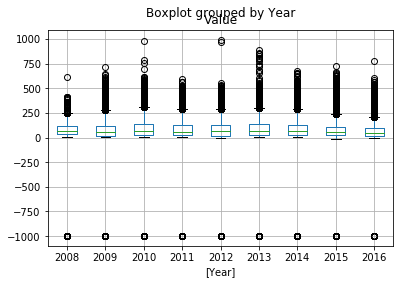

In [17]:
## 绘制分年度的PM2.5箱图（所有箱体在一张图上）
df_box = df[['Year','Value']]
df_box.boxplot(by='Year')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219EB237470>,
      dtype=object)

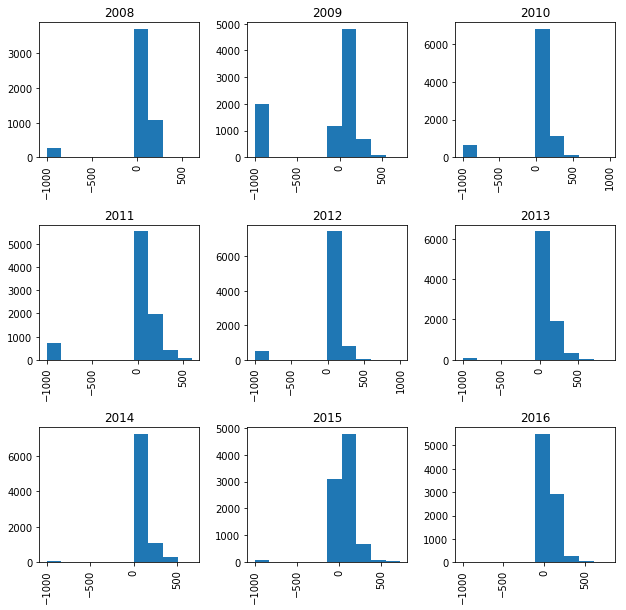

In [18]:
##  分图组绘制PM2.5的直方图
df_hist =  df[['Year','Value']]
df_hist['Value'].hist(by=df['Year'],figsize=[10,10])

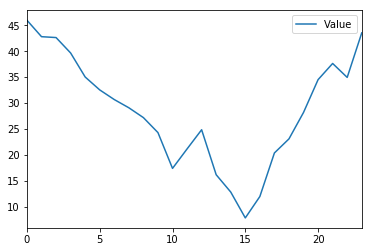

In [26]:
## 绘制一天24小时的PM2.5均值变化的线图
# PM2.5的平均值、中位数、最大值、最小值
dfg_hour = pd.pivot_table(df,index='Hour',values='Value',aggfunc=[np.mean,np.median,np.max,np.min]).reset_index()
dfg_hour
dfg_hour.plot(y='mean')

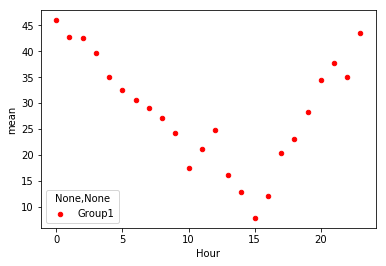

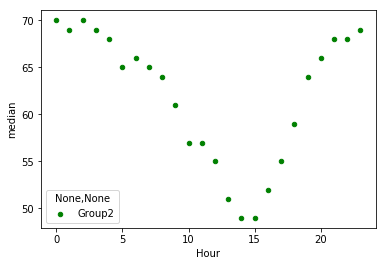

In [30]:
## 绘制一天24小时均值、中位数变化对重叠散点图
ax = dfg_hour.plot.scatter(x='Hour',y='mean',color='red',label='Group1')
dfg_hour.plot.scatter(x='Hour',y='median',color='green',label='Group2')

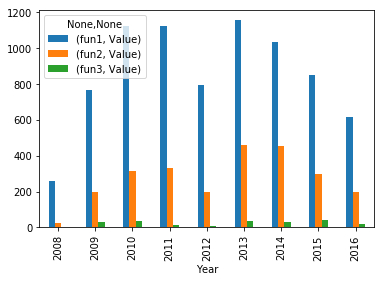

In [33]:
## 各年比较对PM2.5最大值超过100、200、300、5000对天数对分段条图
## 每年PM2.5值大于200，300，500的天数
def fun1(x):
    len_value = len(x.loc[x['Value'] > 200])
    return len_value
def fun2(x):
    len_value = len(x.loc[x['Value'] > 300])
    return len_value
def fun3(x):
    len_value = len(x.loc[x['Value'] > 500])
    return len_value

dfg3 = pd.pivot_table(df,index='Year',values='Value',aggfunc=[fun1,fun2,fun3])
dfg3.plot.bar()

## 实战：分析PM2.5数据
```
基于前面数据整理实战中的成果，要求：
    给出分年度的数据基本描述
    给出分月份的数据基本描述
    按照年月交叉，给出PM2.5的最大值
    检查工作日和周末的北京PM2.5数据有无差异
```

In [34]:
frames = []
for file_name in os.listdir(file_dir_input):
    if ".csv" in file_name:
        tmp = pd.read_csv(file_dir_input + file_name,encoding='unicode_escape')
        frames.append(tmp)
df = pd.concat(frames).reset_index(drop=True)
df

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2008-04-08 15:00,2008,4,8,15,207,µg/mg³,1 Hr,Valid
1,Beijing,PM2.5,2008-04-08 16:00,2008,4,8,16,180,µg/mg³,1 Hr,Valid
2,Beijing,PM2.5,2008-04-08 17:00,2008,4,8,17,152,µg/mg³,1 Hr,Valid
3,Beijing,PM2.5,2008-04-08 18:00,2008,4,8,18,162,µg/mg³,1 Hr,Valid
4,Beijing,PM2.5,2008-04-08 19:00,2008,4,8,19,171,µg/mg³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
75210,Beijing,PM2.5,12/31/2016 19:00,2016,12,31,19,409,ç»?m?1 Hr,Valid,NaN
75211,Beijing,PM2.5,12/31/2016 20:00,2016,12,31,20,432,ç»?m?1 Hr,Valid,NaN
75212,Beijing,PM2.5,12/31/2016 21:00,2016,12,31,21,482,ç»?m?1 Hr,Valid,NaN
75213,Beijing,PM2.5,12/31/2016 22:00,2016,12,31,22,488,ç»?m?1 Hr,Valid,NaN


In [48]:
##  给出分年度的数据基本描述
years = df['Year'].unique()
for year in years:
    df_year = df[df['Year'] == year]
    print(df_year.describe())

         Year        Month          Day         Hour        Value
count  5087.0  5087.000000  5087.000000  5087.000000  5087.000000
mean   2008.0     7.222725    15.873403    11.499509    28.405937
std       0.0     2.019403     8.828938     6.923459   248.882013
min    2008.0     4.000000     1.000000     0.000000  -999.000000
25%    2008.0     5.000000     8.000000     5.500000    32.000000
50%    2008.0     7.000000    16.000000    11.000000    66.000000
75%    2008.0     9.000000    23.500000    17.500000   119.000000
max    2008.0    11.000000    31.000000    23.000000   610.000000
         Year        Month          Day         Hour        Value
count  8760.0  8760.000000  8760.000000  8760.000000  8760.000000
mean   2009.0     6.526027    15.720548    11.500114  -147.127626
std       0.0     3.448048     8.796749     6.922433   466.460213
min    2009.0     1.000000     1.000000     0.000000  -999.000000
25%    2009.0     4.000000     8.000000     5.750000    11.000000
50%    200

In [49]:
## 给出分月份的数据基本描述
months = df['Month'].unique()
for month in months:
    df_year = df[df['Month'] == month]
    print(df_year.describe())

              Year   Month          Day         Hour        Value
count  6297.000000  6297.0  6297.000000  6297.000000  6297.000000
mean   2012.116246     4.0    15.824678    11.510719    38.057646
std       2.526446     0.0     8.557512     6.924276   225.428456
min    2008.000000     4.0     1.000000     0.000000  -999.000000
25%    2010.000000     4.0     9.000000     6.000000    28.000000
50%    2012.000000     4.0    16.000000    12.000000    66.000000
75%    2014.000000     4.0    23.000000    18.000000   115.000000
max    2016.000000     4.0    30.000000    23.000000   722.000000
              Year   Month         Day         Hour        Value
count  6696.000000  6696.0  6696.00000  6696.000000  6696.000000
mean   2012.000000     5.0    16.00000    11.500000    21.685036
std       2.582182     0.0     8.94494     6.922704   244.152613
min    2008.000000     5.0     1.00000     0.000000  -999.000000
25%    2010.000000     5.0     8.00000     5.750000    32.000000
50%    2012.0000

In [52]:
## 按照年月交叉，给出PM2.5的最大值
df.pivot_table(index=['Year','Month'],values='Value',aggfunc=max)

Value
Year Month       
2008 4        610
     5        405
     6        270
     7        272
     8        195
...           ...
2016 8        138
     9        244
     10       289
     11       378
     12       543

[104 rows x 1 columns]

In [78]:
## 检查工作日和周末的北京PM2.5数据有无差异
## 使用Date（LST）变量建立DatetimeIndex
df_datetimeindex =  df.set_index(pd.to_datetime(df['Date (LST)']))
df_datetimeindex['weekday'] = df_datetimeindex.index.weekday
df_workday = df_datetimeindex[df_datetimeindex['weekday'] < 5]
df_weekend = df_datetimeindex[df_datetimeindex['weekday'] >= 5]
from scipy import stats as ss
ss.ttest_ind(df_workday['Value'],df_weekend['Value'])

Ttest_indResult(statistic=3.4415006380342628, pvalue=0.0005788113248492037)